# ML Project: Adult income prediction

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('adult.csv')

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [6]:
df = pd.concat([df.drop('occupation', axis=1), pd.get_dummies(df.occupation).add_prefix('occupation_')], axis=1)
df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df.workclass).add_prefix('workclass_')], axis=1)
df = df.drop('education', axis=1)
df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status']).add_prefix('marital-status_')], axis=1)
df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df.relationship).add_prefix('relationship_')], axis=1)
df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df.race).add_prefix('race_')], axis=1)
df = pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country']).add_prefix('native-country_')], axis=1)


In [7]:
df.gender = df.gender.apply(lambda x: 1 if x == 'Male' else 0)
df.income = df.income.apply(lambda x: 1 if x == '>50K' else 0)

In [8]:
df = df.astype(int)

<Axes: >

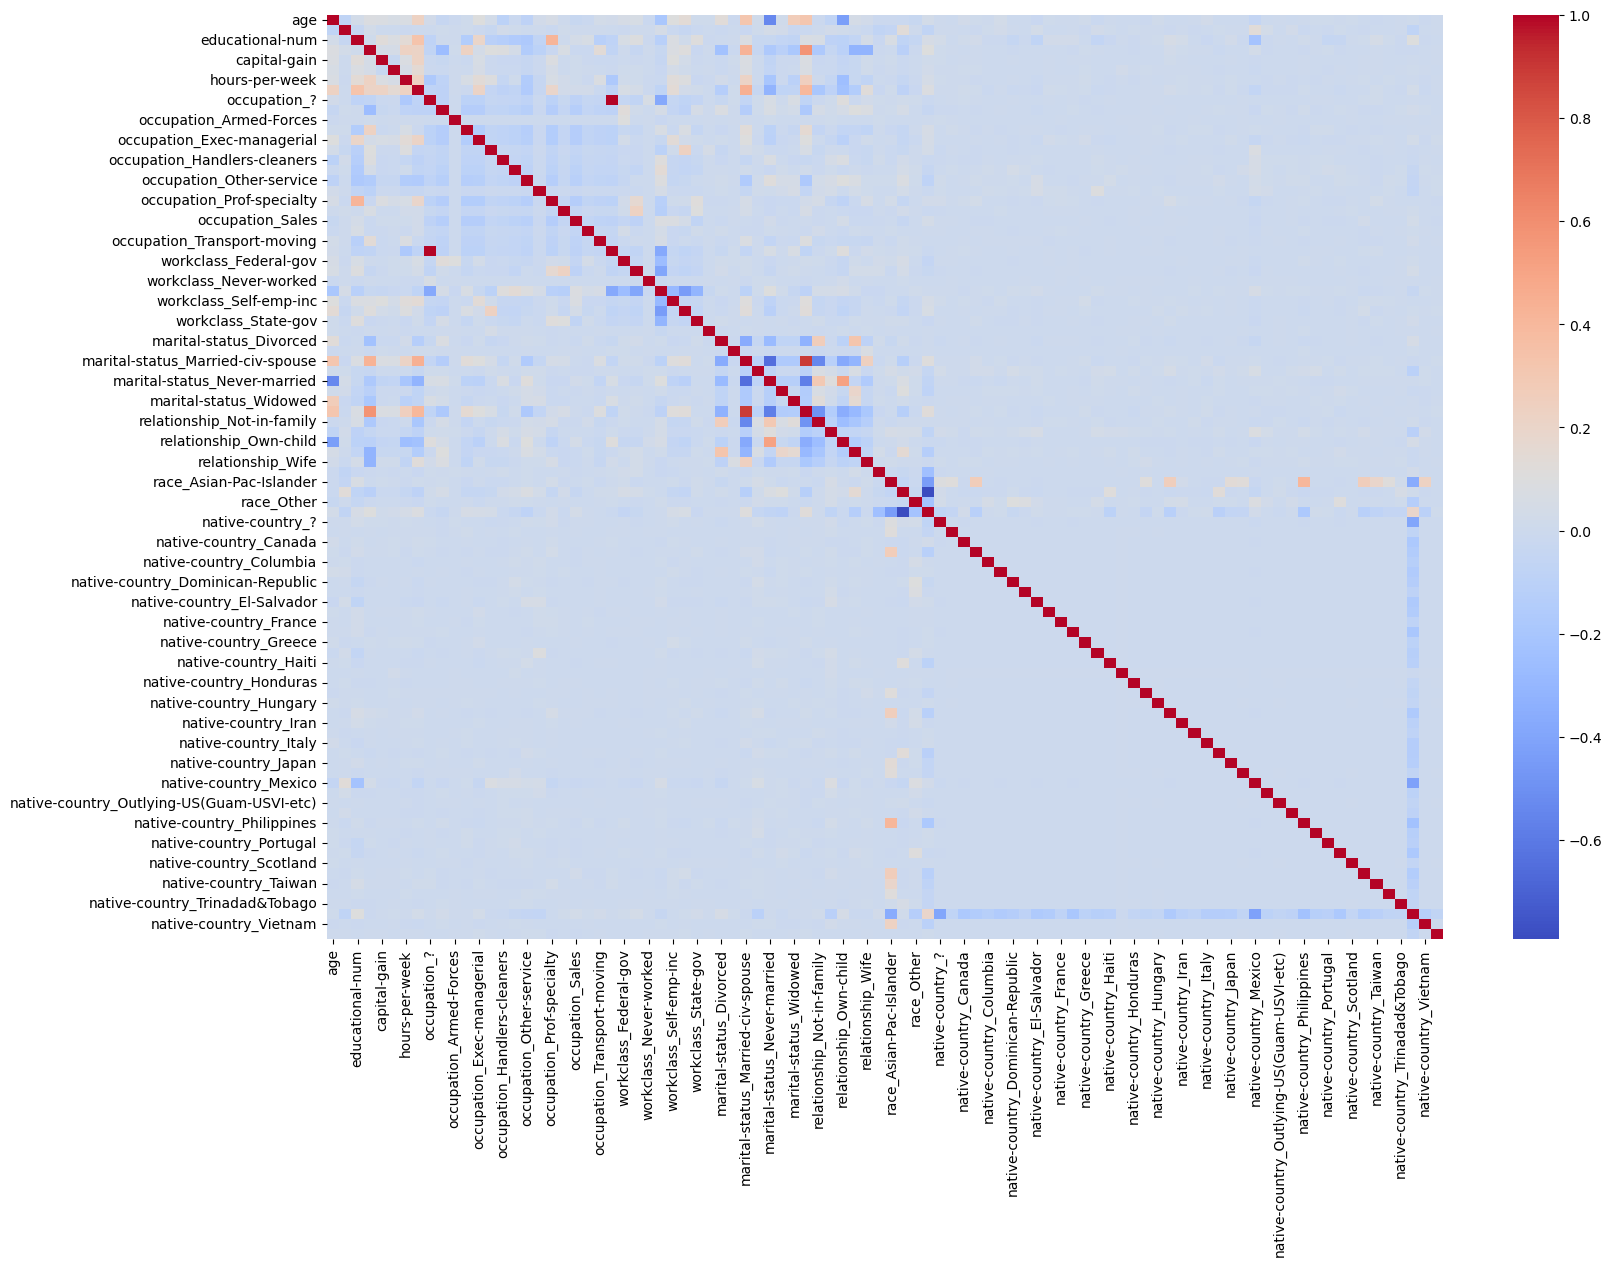

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

In [10]:
df.corr()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
age,1.000000,-0.076628,0.030940,0.088120,0.077229,0.056944,0.071558,0.230369,0.025683,-0.038116,...,0.007016,0.005474,0.012281,-0.001942,-0.011872,-0.001766,0.001056,0.011888,-0.012337,0.002905
fnlwgt,-0.076628,1.000000,-0.038761,0.027739,-0.003706,-0.004366,-0.013519,-0.006339,-0.005405,0.007480,...,-0.013577,0.008708,-0.006523,-0.010342,-0.001733,-0.001512,0.004153,-0.070645,-0.007479,0.004699
educational-num,0.030940,-0.038761,1.000000,0.009328,0.125146,0.080972,0.143689,0.332613,-0.080053,0.004142,...,-0.047816,-0.041776,0.000907,0.012984,0.045420,0.007283,-0.010201,0.104210,-0.007544,-0.005798
gender,0.088120,0.027739,0.009328,1.000000,0.047094,0.045480,0.228560,0.214628,-0.063844,-0.260349,...,0.009649,-0.009940,-0.002178,-0.005272,0.003041,-0.007117,-0.009342,-0.011167,-0.001545,0.005262
capital-gain,0.077229,-0.003706,0.125146,0.047094,1.000000,-0.031441,0.082157,0.223013,-0.019157,-0.029105,...,-0.004355,-0.006137,-0.002317,0.003906,0.004260,-0.002781,-0.003039,0.004191,-0.002673,-0.000474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Thailand,-0.001766,-0.001512,0.007283,-0.007117,-0.002781,-0.002338,0.008558,-0.004219,-0.002575,-0.001157,...,-0.000919,-0.001525,-0.000514,-0.001204,-0.000905,1.000000,-0.000583,-0.073329,-0.001041,-0.000538
native-country_Trinadad&Tobago,0.001056,0.004153,-0.010201,-0.009342,-0.003039,0.004028,-0.002911,-0.009107,-0.002068,0.007917,...,-0.000872,-0.001446,-0.000488,-0.001143,-0.000859,-0.000583,1.000000,-0.069564,-0.000988,-0.000510
native-country_United-States,0.011888,-0.070645,0.104210,-0.011167,0.004191,0.009449,0.004390,0.032551,0.005546,0.022126,...,-0.109626,-0.181890,-0.061346,-0.143695,-0.107976,-0.073329,-0.069564,1.000000,-0.124226,-0.064202
native-country_Vietnam,-0.012337,-0.007479,-0.007544,-0.001545,-0.002673,-0.000118,-0.008289,-0.015542,-0.004082,0.010905,...,-0.001557,-0.002583,-0.000871,-0.002040,-0.001533,-0.001041,-0.000988,-0.124226,1.000000,-0.000912


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
df = df.drop('fnlwgt', axis=1)
train_df, test_df = train_test_split(df, test_size=0.2)

In [12]:
train_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
29124,57,13,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
29064,22,2,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20844,25,11,1,0,0,45,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
40589,22,10,0,0,0,35,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
10508,18,10,0,0,0,20,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386,32,15,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17073,18,10,1,0,0,33,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6122,50,11,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17200,21,10,1,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
train_X = train_df.drop('income', axis=1)
train_y = train_df.income
test_X = test_df.drop('income', axis=1)
test_y = test_df.income

In [14]:
train_y

29124    0
29064    0
20844    0
40589    0
10508    0
        ..
24386    1
17073    0
6122     0
17200    0
24020    0
Name: income, Length: 39073, dtype: int32

In [15]:
forest = RandomForestClassifier()
forest.fit(train_X, train_y)

RandomForestClassifier()

In [16]:
forest.score(test_X, test_y)

0.8526973078104207

In [17]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [18]:
importances

{'age': 0.22714700972194982,
 'educational-num': 0.1284211869262014,
 'hours-per-week': 0.11356709152744,
 'capital-gain': 0.10846368848441297,
 'marital-status_Married-civ-spouse': 0.06279853426871539,
 'relationship_Husband': 0.0518884375599118,
 'capital-loss': 0.037882720716072175,
 'marital-status_Never-married': 0.026397627605114764,
 'occupation_Exec-managerial': 0.020587135759735746,
 'occupation_Prof-specialty': 0.017482680242837643,
 'gender': 0.015150701711019862,
 'relationship_Not-in-family': 0.012555648053146773,
 'relationship_Wife': 0.011826563471698947,
 'relationship_Own-child': 0.010349204261775047,
 'workclass_Private': 0.00923197638677596,
 'occupation_Other-service': 0.008344679236791674,
 'workclass_Self-emp-not-inc': 0.008283473777478565,
 'occupation_Craft-repair': 0.006549245110061352,
 'native-country_United-States': 0.006382969985996595,
 'workclass_Self-emp-inc': 0.006242066265658694,
 'race_White': 0.006236417610487581,
 'occupation_Sales': 0.0062361353846

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, None],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=param_grid, verbose=10)

In [20]:
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/16] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.834 total time=   0.7s
[CV 2/5; 1/16] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/16] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.831 total time=   0.7s
[CV 3/5; 1/16] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/16] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.835 total time=   0.7s
[CV 4/5; 1/16] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/16] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.843 total time=   0.6s
[CV 5/5; 1/16] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 5

[CV 4/5; 8/16] END max_depth=5, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.821 total time=   1.0s
[CV 5/5; 8/16] START max_depth=5, max_features=log2, min_samples_split=4, n_estimators=100
[CV 5/5; 8/16] END max_depth=5, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.817 total time=   1.0s
[CV 1/5; 9/16] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 9/16] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.849 total time=   4.8s
[CV 2/5; 9/16] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 9/16] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.845 total time=   4.3s
[CV 3/5; 9/16] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 9/16] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.848 total time=   4.0s
[CV 4/5; 9/16]

[CV 2/5; 16/16] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.847 total time=   8.2s
[CV 3/5; 16/16] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 3/5; 16/16] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.857 total time=   7.1s
[CV 4/5; 16/16] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 4/5; 16/16] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.851 total time=   7.2s
[CV 5/5; 16/16] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100
[CV 5/5; 16/16] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.852 total time=   7.4s


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100]},
             verbose=10)

In [21]:
grid_search.best_estimator_

RandomForestClassifier(min_samples_split=4)

In [22]:
forest = grid_search.best_estimator_
forest.score(test_X, test_y)

0.8577131743269526

In [23]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [24]:
importances

{'age': 0.19960679063320227,
 'educational-num': 0.1338970870254862,
 'capital-gain': 0.12252870556121925,
 'hours-per-week': 0.10487228993032567,
 'marital-status_Married-civ-spouse': 0.08005345394493874,
 'relationship_Husband': 0.043900464147064756,
 'capital-loss': 0.04076387543579302,
 'marital-status_Never-married': 0.03292236286865085,
 'occupation_Exec-managerial': 0.022371089626969223,
 'occupation_Prof-specialty': 0.017997782889394933,
 'gender': 0.013044308637400812,
 'relationship_Not-in-family': 0.011485563665516086,
 'relationship_Wife': 0.010873500524644157,
 'relationship_Own-child': 0.009142608309412988,
 'occupation_Other-service': 0.008747068938132005,
 'workclass_Private': 0.008713438103494599,
 'workclass_Self-emp-not-inc': 0.008434311061655902,
 'marital-status_Divorced': 0.007849440815440931,
 'workclass_Self-emp-inc': 0.007055148975231348,
 'relationship_Unmarried': 0.0063427870801412494,
 'native-country_United-States': 0.006257214726043761,
 'race_White': 0.00